In [1]:
from protein_universe_annotate.evaluation.evaluation_utils import number_correct, raw_unweighted_accuracy, \
    calc_mean_accuracy_per_class, get_misclassified_samples

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
preds_path = '/content/drive/MyDrive/instaDeep/google-orig-model/predictions_test_5356760_model/test_dataset_TOP5_preds.csv'

In [5]:
# Read the csv file containing predictions and true labels
predictions_df = pd.read_csv(preds_path)

In [6]:
# Extract the length of each sequence DataFrame
predictions_df['sequence_length'] = predictions_df['sequence'].apply(len)

In [7]:
TRUE_LABEL_KEY = 'true_label'
PREDICTED_LABEL_KEY = 'predicted_label'
ACCURACY_KEY = 'accuracy'
NUM_EXAMPLES_KEY = 'num_samples'

In [8]:
predictions_df[PREDICTED_LABEL_KEY] = predictions_df['predicted_label_1']



---



---



In [10]:
accuracy_preds = raw_unweighted_accuracy(predictions_df, true_label='true_label', predicted_label='predicted_label_1')
accuracy_preds

0.9950464052753802

In [11]:
# Error rate
print('family calling error rate (percentage) = {:.03f}'.format(100-sum(predictions_df.true_label == predictions_df.predicted_label_1) / len(predictions_df) * 100))

family calling error rate (percentage) = 0.495


In [12]:
misclassified_samples_df = get_misclassified_samples(predictions_df, true_label='true_label', predicted_label='predicted_label_1')

In [13]:
print(f'The number of misclassified samples: {len(misclassified_samples_df)}')

The number of misclassified samples: 625


In [14]:
for preds_priority in range(1, 6):
    # Print the current priority level being evaluated
    print(f'\n##### Evaluating predictions with priority {preds_priority}...')

    # when preds 1 applied, the size of test dataset = number of miclassifications
    if preds_priority == 1:
        misclassified_samples_df = predictions_df.copy()

    # Print the total number of samples used for evaluation
    num_samples = len(misclassified_samples_df)
    print(f'Total number of samples used for evaluation: {num_samples}')

    # Evaluate the number of correct predictions using the current priority level
    correct_preds = number_correct(misclassified_samples_df, true_label='true_label', predicted_label=f'predicted_label_{preds_priority}')
    print(f'Number of correct predictions with preds priority #{preds_priority}: {correct_preds}')

    # Evaluate the accuracy using the current priority level
    accuracy_preds = raw_unweighted_accuracy(misclassified_samples_df, true_label='true_label', predicted_label=f'predicted_label_{preds_priority}')
    print(f'Accuracy with preds priority #{preds_priority}: {accuracy_preds}')

    # Get the misclassified samples using the current priority level
    misclassified_samples_df = get_misclassified_samples(misclassified_samples_df, true_label='true_label', predicted_label=f'predicted_label_{preds_priority}')
    num_misclassified = len(misclassified_samples_df)
    print(f'The number of misclassifications when preds #{preds_priority} used on misclassifications: {num_misclassified}')


##### Evaluating predictions with priority 1...
Total number of samples used for evaluation: 126171
Number of correct predictions with preds priority #1: 125546
Accuracy with preds priority #1: 0.9950464052753802
The number of misclassifications when preds #1 used on misclassifications: 625

##### Evaluating predictions with priority 2...
Total number of samples used for evaluation: 625
Number of correct predictions with preds priority #2: 289
Accuracy with preds priority #2: 0.4624
The number of misclassifications when preds #2 used on misclassifications: 336

##### Evaluating predictions with priority 3...
Total number of samples used for evaluation: 336
Number of correct predictions with preds priority #3: 68
Accuracy with preds priority #3: 0.20238095238095238
The number of misclassifications when preds #3 used on misclassifications: 268

##### Evaluating predictions with priority 4...
Total number of samples used for evaluation: 268
Number of correct predictions with preds priori

| Metric                     | Preds1 | Preds2 | Preds3 | Preds4 | Preds5 |
| ------------------------- | ------ | ------ | ------ | ------ | ------ |
| Total number of samples   |  126.171  |  625  |  336  |  268  |  230  |
| Accuracy                  |  99.5%   |  46.2%|  20.2%|  14.2%|  10.4%|
| Misclassification number  |  625     |  336  |  268  |  230  |  206  |




---



---



### Analyze misclassifications

In [16]:
misclassified_samples_df.shape

(206, 14)

Check the distribution of true labels and predicted labels among the misclassified samples. For example, create a count plot to visualize this distribution and see if there are any imbalances or biases in the algorithm's predictions. However, there are around 18k classes, so visualizing would not work.

In [17]:
# Count the number of samples per true label and predicted label
misclassified_true_label_counts = misclassified_samples_df['true_label'].value_counts(sort=True)

# Count the number of samples per true label and predicted label
# true_counts = misclassified_samples_df['true_label'].value_counts()
# pred_counts = misclassified_samples_df['predicted_label'].value_counts()

# Plot the counts using a bar plot
# sns.barplot(x=true_counts.index, y=true_counts.values, color='blue', label='True label')
# sns.barplot(x=pred_counts.index, y=pred_counts.values, color='orange', label='Predicted label')
# plt.legend()
# plt.title('Distribution of true and predicted labels among misclassified samples')
# plt.xlabel('Label')
# plt.ylabel('Number of samples')
# plt.show()

In [18]:
misclassified_true_label_counts

PF06480    3
PF13894    2
PF10263    2
PF07646    2
PF14753    2
          ..
PF00887    1
PF00169    1
PF16656    1
PF15980    1
PF00898    1
Name: true_label, Length: 199, dtype: int64

In [19]:
max(misclassified_true_label_counts.values)

3

In [20]:
sum(misclassified_true_label_counts.values == 3)

1

In [21]:
sum(misclassified_true_label_counts.values == 2)

5

In [22]:
sum(misclassified_true_label_counts.values == 1)

193

**Observation**: out of 206 misclassifications, most classes appear just once. Hence, there are no imbalances or biases in the algorithm's predictions.

In [24]:
# Compare mean of seq_len of misclassifications and mean of seq_len of total predictions
# Is there a difference?
misclassified_samples_df['sequence_length'].mean()

143.79126213592232

In [25]:
predictions_df['sequence_length'].mean()

154.16684499607675

Text(0, 0.5, 'Occurrence')

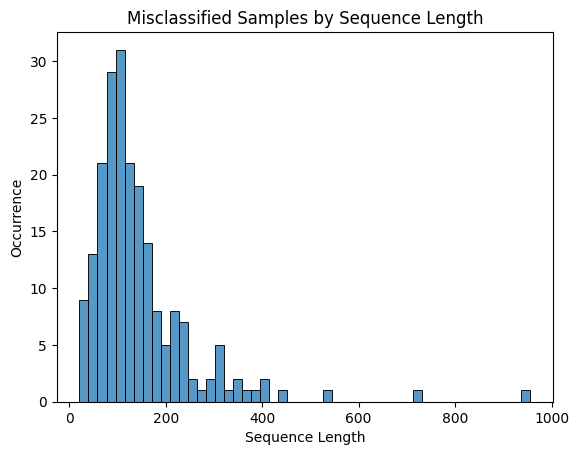

In [26]:
sns.histplot(data=misclassified_samples_df, x='sequence_length', bins=50)
plt.title('Misclassified Samples by Sequence Length')
plt.xlabel('Sequence Length')
plt.ylabel('Occurrence')

**Observations**: misclassifications have similar sequence length to overall dataset.



---



---



In [27]:
avg_acc_per_true_label_df = calc_mean_accuracy_per_class(predictions_df, 'true_label', 'predicted_label')

In [28]:
avg_acc_per_true_label_df.head()

,true_label,avg_accuracy
0,PF00001,1.0
1,PF00002,1.0
2,PF00003,1.0
3,PF00004,1.0
4,PF00005,1.0


In [29]:
assert len(avg_acc_per_true_label_df) == predictions_df['true_label'].nunique()

In [30]:
# Accuracy above 50% - how many data samples?
(avg_acc_per_true_label_df['avg_accuracy'] < 0.5).sum()

78

In [31]:
# Accuracy above 50% - how many data samples?
(avg_acc_per_true_label_df['avg_accuracy'] < 0.7).sum()

200

**Conclusion**: out of ~18k labels, only 200 have less than 70% mean accuracy. Low accuracy predictions can be further examined having a domain knowledge. 

In [32]:
# Select TOP Best predictions and TOP Worst predictions
sorted_avg_acc_per_true_label_df = avg_acc_per_true_label_df.sort_values(by='avg_accuracy', ascending=False)
sorted_avg_acc_per_true_label_df.head(10)

,true_label,avg_accuracy
0,PF00001,1.0
8609,PF12449,1.0
8599,PF12439,1.0
8600,PF12440,1.0
8601,PF12441,1.0
8602,PF12442,1.0
8603,PF12443,1.0
8604,PF12444,1.0
8605,PF12445,1.0
8606,PF12446,1.0




---



---



In [33]:
preds_true_label_counts = predictions_df['true_label'].value_counts().reset_index()
preds_true_label_counts.columns = ['true_label', 'count']

In [34]:
preds_true_label_counts.shape

(13071, 2)

In [35]:
preds_true_label_counts

,true_label,count
0,PF13649,454
1,PF00560,240
2,PF13508,219
3,PF06580,192
4,PF02397,190
...,...,...
13066,PF15187,1
13067,PF03731,1
13068,PF06573,1
13069,PF17336,1


In [36]:
preds_true_label_counts.columns

Index(['true_label', 'count'], dtype='object')

In [37]:
avg_acc_per_true_label_df.columns

Index(['true_label', 'avg_accuracy'], dtype='object')

In [38]:
# Merge two DataFrame together on the common 'true_label' values
preds_true_label_counts_avg_acc = preds_true_label_counts.merge(avg_acc_per_true_label_df, on='true_label')

In [39]:
preds_true_label_counts_avg_acc.head()

,true_label,count,avg_accuracy
0,PF13649,454,1.0
1,PF00560,240,1.0
2,PF13508,219,1.0
3,PF06580,192,1.0
4,PF02397,190,1.0


In [40]:
# Calculate the correlation between the count and avg_accuracy columns 
# as they are in the original preds_true_label_counts_avg_acc dataframe

correlation = preds_true_label_counts_avg_acc['count'].corr(preds_true_label_counts_avg_acc['avg_accuracy'])
correlation

0.055100781837687

Text(0, 0.5, 'Average Accuracy')

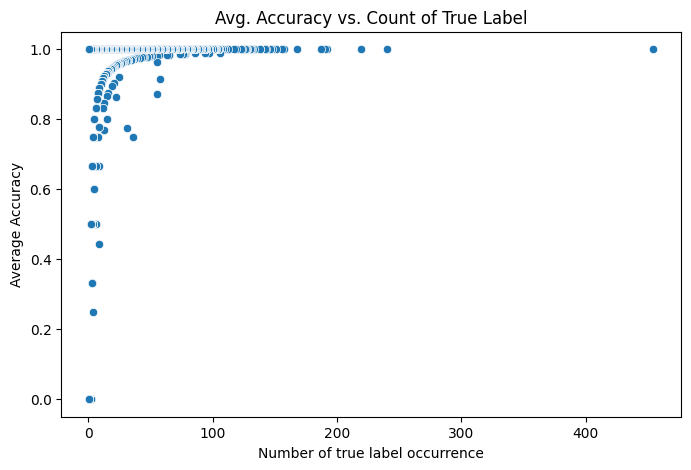

In [41]:
plt.figure(figsize=(8, 5))

sns.scatterplot(data=preds_true_label_counts_avg_acc, x='count', y='avg_accuracy')

plt.title('Avg. Accuracy vs. Count of True Label')
plt.xlabel('Number of true label occurrence')
plt.ylabel('Average Accuracy')

In [42]:
# Group by the count column and take the mean of the avg_accuracy column for each group 
# This results in a new dataframe with unique counts and their corresponding mean avg_accuracy values. 

preds_true_label_counts_avg_acc = preds_true_label_counts_avg_acc.groupby('count').agg({'avg_accuracy': 'mean'})
preds_true_label_counts_avg_acc = preds_true_label_counts_avg_acc.reset_index()

In [43]:
# this method of calculating correlation is preferred since 
# the goal is to investigate the relationship between the two variables
# because it first aggregates the data into groups and calculates the correlation between the group means,
# which can provide a more accurate representation of the relationship between the variables.

correlation_aggregated = preds_true_label_counts_avg_acc['count'].corr(preds_true_label_counts_avg_acc['avg_accuracy'])
correlation_aggregated

0.4239281493471381

In [44]:
preds_true_label_counts_avg_acc.corr(method='pearson')

,count,avg_accuracy
count,1.000000,0.423928
avg_accuracy,0.423928,1.000000


**Observation**: A Pearson correlation coefficient of 0.4239 indicates a positive correlation between the two variables being analyzed. This value ranges between -1 and 1, where a value of 1 represents a perfect positive correlation, a value of 0 indicates no correlation, and a value of -1 represents a perfect negative correlation. Therefore, a correlation coefficient of 0.4239 suggests a moderate positive correlation between the two variables.  

This means that as the value of 'count' (number of observations of a class label) increases, there is a tendency for the value of 'avg_accuracy' to also increase.  

It is important to note that correlation values only describe the linear relationship between two variables and do not necessarily indicate causation.

Text(0, 0.5, 'Average Accuracy')

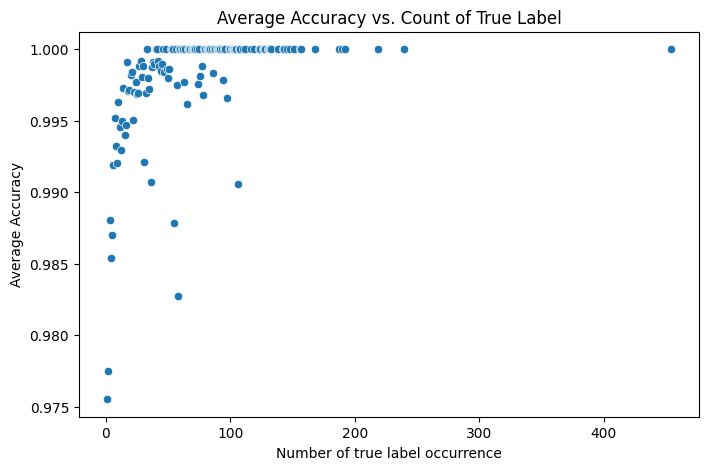

In [45]:
plt.figure(figsize=(8, 5))

sns.scatterplot(data=preds_true_label_counts_avg_acc, x='count', y='avg_accuracy')
# sns.lineplot(data=preds_true_label_counts_avg_acc, x='count', y='avg_accuracy')

plt.title('Average Accuracy vs. Count of True Label')
plt.xlabel('Number of true label occurrence')
plt.ylabel('Average Accuracy')

(0.0, 150.0)

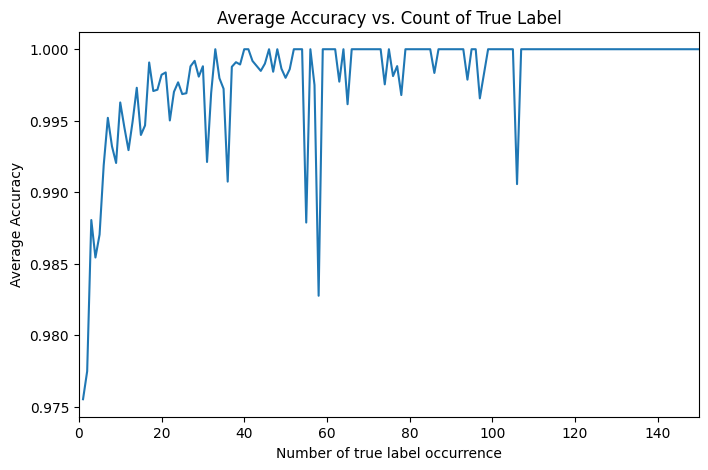

In [46]:
plt.figure(figsize=(8, 5))

sns.lineplot(data=preds_true_label_counts_avg_acc, x='count', y='avg_accuracy')

plt.title('Average Accuracy vs. Count of True Label')
plt.xlabel('Number of true label occurrence')
plt.ylabel('Average Accuracy')

# Set the x-axis limits
plt.xlim(0, 150)



---



---



In [47]:
mean_seq_length_by_label = predictions_df.groupby('true_label')['sequence_length'].mean()
mean_seq_length_by_label_df = mean_seq_length_by_label.reset_index()

In [48]:
mean_seq_length_by_label_df

,true_label,sequence_length
0,PF00001,265.333333
1,PF00002,244.000000
2,PF00003,236.376623
3,PF00004,134.150000
4,PF00005,165.400000
...,...,...
13066,PF18865,93.000000
13067,PF18868,126.000000
13068,PF18869,146.000000
13069,PF18870,127.750000


In [49]:
# Merge two DataFrame together on the common 'true_label' values
preds_seq_len_avg_acc = mean_seq_length_by_label_df.merge(avg_acc_per_true_label_df, on='true_label')

In [50]:
preds_seq_len_avg_acc.head()

,true_label,sequence_length,avg_accuracy
0,PF00001,265.333333,1.0
1,PF00002,244.000000,1.0
2,PF00003,236.376623,1.0
3,PF00004,134.150000,1.0
4,PF00005,165.400000,1.0


In [51]:
preds_seq_len_avg_acc.shape

(13071, 3)

Text(0, 0.5, 'Avg. Accuracy')

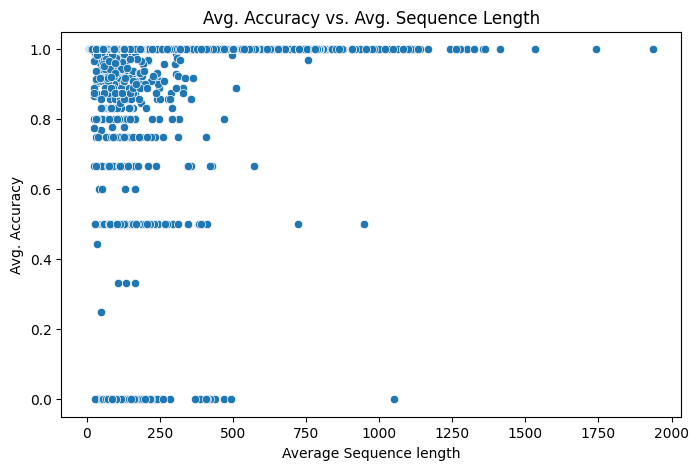

In [52]:
plt.figure(figsize=(8, 5))

sns.scatterplot(data=preds_seq_len_avg_acc, x='sequence_length', y='avg_accuracy')

plt.title('Avg. Accuracy vs. Avg. Sequence Length')
plt.xlabel('Average Sequence length')
plt.ylabel('Avg. Accuracy')

In [53]:
preds_seq_len_avg_acc = preds_seq_len_avg_acc.groupby('sequence_length').agg({'avg_accuracy': 'mean'})

Text(0, 0.5, 'Avg. Accuracy')

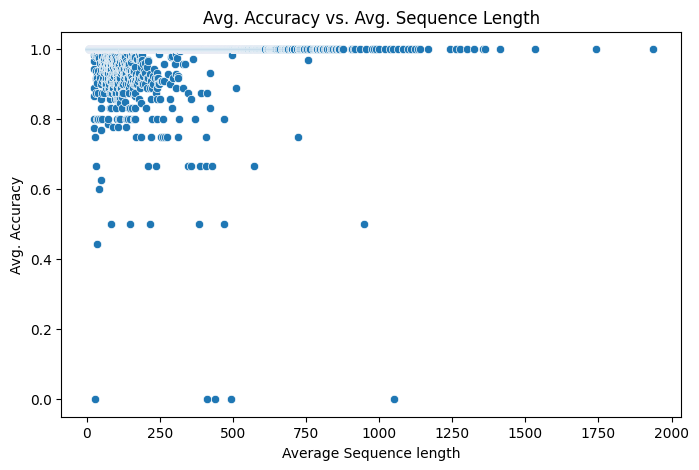

In [54]:
plt.figure(figsize=(8, 5))

sns.scatterplot(data=preds_seq_len_avg_acc, x='sequence_length', y='avg_accuracy')

plt.title('Avg. Accuracy vs. Avg. Sequence Length')
plt.xlabel('Average Sequence length')
plt.ylabel('Avg. Accuracy')

In [55]:
preds_seq_len_avg_acc_df = preds_seq_len_avg_acc.reset_index()
preds_seq_len_avg_acc_df.columns = ['avg_seq_len', 'avg_accuracy']

In [56]:
preds_seq_len_avg_acc_df

,avg_seq_len,avg_accuracy
0,9.000000,1.0
1,10.000000,1.0
2,10.833333,1.0
3,10.888889,1.0
4,11.000000,1.0
...,...,...
6260,1361.600000,1.0
6261,1412.000000,1.0
6262,1533.363636,1.0
6263,1742.833333,1.0


In [57]:
# compute the correlation between the two columns
correlation_length_accuracy = preds_seq_len_avg_acc_df['avg_seq_len'].corr(preds_seq_len_avg_acc_df['avg_accuracy'])
correlation_length_accuracy

-0.013954270703951863

**Observation**: The Pearson correlation coefficient is a measure of the linear correlation between two variables, where a value of 1 indicates a perfect positive linear correlation, 0 indicates no linear correlation, and -1 indicates a perfect negative linear correlation.

In the case of a value of -0.013954270703951863, this indicates a very weak and almost negligible negative linear correlation between the sequence length and average accuracy.  

It's important to note that a low correlation coefficient does not necessarily imply that there is no relationship between the variables, but rather that the relationship may be nonlinear, or that there may be other factors affecting the relationship. Additionally, correlation does not necessarily imply causation, so it is important to exercise caution in interpreting the results.  



---



---

